<a href="https://colab.research.google.com/github/Harshtherocking/colab-lab/blob/main/hooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hooks** in Pytorch

In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt

from PIL import Image
import torch.nn.functional as F

from torchvision import transforms, models
import urllib.request
import numpy as np

## Model loading

In [14]:
def preprocess_image(img_path):
    """Load and preprocess images for PyTorch models."""
    img = Image.open(img_path).convert("RGB")
    #Transforms used by imagenet models
    transform = transforms.Compose([
        # transforms.Resize((224, 224)),
        transforms.Resize((384,384)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return transform(img).unsqueeze(0)

In [45]:
def process_grad (grad) :
  g = np.copy(grad)

  if len(g.shape) >= 3 :
    g = np.transpose(g, (1,2,0))

  g = np.maximum(0, g)

  g -= np.min(g)
  g /= (np.max(g) + 1e-9)
  return g


In [3]:
from torchvision.models import ViT_B_16_Weights
vit= models.vit_b_16(ViT_B_16_Weights.IMAGENET1K_SWAG_E2E_V1)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/vit_b_16_swag-9ac1b537.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16_swag-9ac1b537.pth
100%|██████████| 331M/331M [00:14<00:00, 24.6MB/s]


In [4]:
vit.eval()

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

## Prediction

In [16]:
img1 = preprocess_image("34.jpg")
img2 = preprocess_image("100.jpg")

In [59]:
img_tensor = img2.clone()
img_tensor.requires_grad = True

In [60]:
pred = vit(img_tensor)
pred.shape

torch.Size([1, 1000])

In [61]:
pred.argmax()

tensor(100)

In [62]:
y = pred.argmax()

pred[:, y].backward()

In [63]:
img_tensor.grad.shape

torch.Size([1, 3, 384, 384])

In [64]:
grad = img_tensor.grad.detach().cpu().numpy()
grad.shape

(1, 3, 384, 384)

In [65]:
pro_grads = process_grad(grad.squeeze())

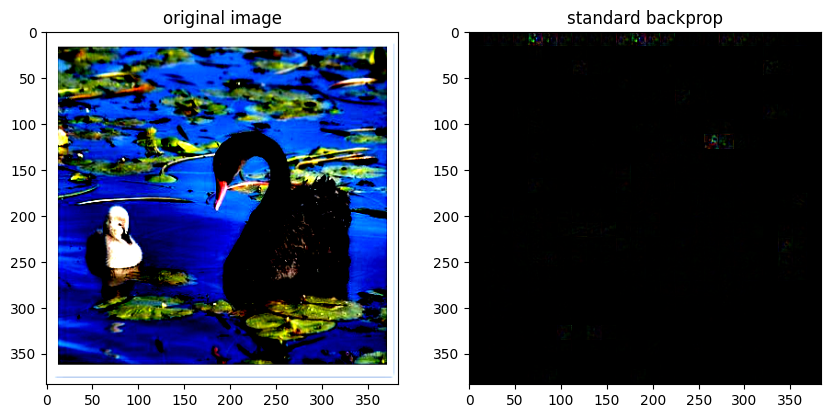

In [68]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(img2.squeeze().permute(1,2,0))
plt.title ("original image")
plt.subplot(1,2,2)
plt.imshow(pro_grads)
plt.title ("standard backprop")
plt.show()